In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [3]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


## Part 1: Understanding Product Categories

In [5]:
#Frequency Tables
frequency_table = df['category'].value_counts()
frequency_table.head()

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [20]:
top_5 = frequency_table.head()

Which are the top 5 most listed product categories?

'Sports & Outdoors',  'Beauty',  'Handmade Clothing,  'Shoes & Accessories',  'Bath & Body' and 'Birthday Gifts'.   

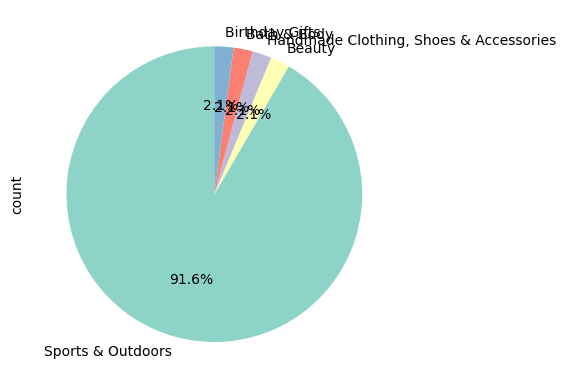

In [ ]:
# Visualizations
top_5.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"))
plt.show()

For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

categoría sports and outdoors representa aproximadamente 45% de los productos en el top 5, mientras que las demás categorías tienen proporciones considerablemente menores. 

## Part 2: Delving into Product Pricing

In [26]:
# Measures of Centrality
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

(89.24380943923663, 19.09, 9.99)

What's the average price point of products listed? How does this compare with the most common price point (mode)?

El precio promedio de los productos listados es de aproximadamente $89.24, mientras que el precio más común es $9.99.
Esta gran diferencia sugiere que la mayoría de los productos son relativamente económicos, pero existen algunos productos con precios muy altos que elevan la media.

In [27]:
# Measures of Dispersion
variance_price = df['price'].var()
std_dev_price = df['price'].std()
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

variance_price, std_dev_price, min_price, max_price, range_price, IQR

(119445.48532256528, 345.60886175352226, 0.0, 100000.0, 100000.0, 36.0)

How varied are the product prices? Are there any indicators of a significant spread in prices?

Los precios tienen una variabilidad muy grande, con productos que van desde gratuitos o muy baratos hasta productos extremadamente caros (100k).

El rango y la desviación estándar son muy grandes.

El IQR pequeño (36) en comparación con el rango total sugiere que la mayoría de los productos están concentrados en precios bajos, pero existen unos pocos productos con precios muy altos que estiran la distribución.



In [30]:
df['price'].value_counts()

price
9.99       48922
12.99      38823
8.99       34058
7.99       33632
14.99      32570
           ...  
2398.99        1
1453.08        1
1785.63        1
1347.36        1
317.34         1
Name: count, Length: 82916, dtype: int64

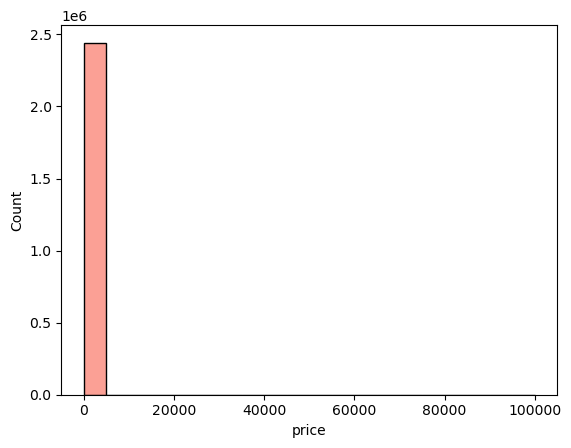

In [33]:
# Visualizations
sns.histplot(df['price'], kde=False, bins=20, color="salmon")
plt.show()

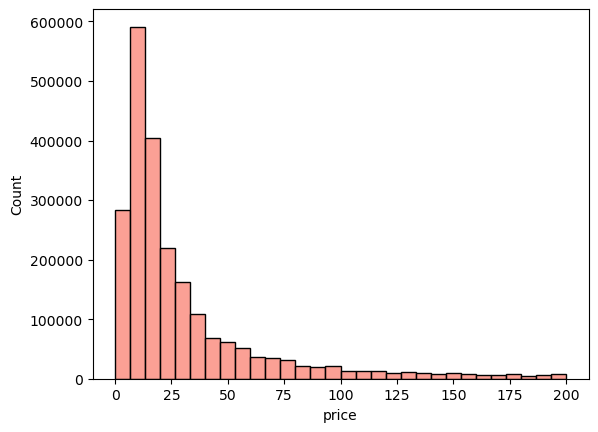

In [37]:
sns.histplot(df[df['price'] <= 200]['price'], bins=30, color="salmon")
plt.show()

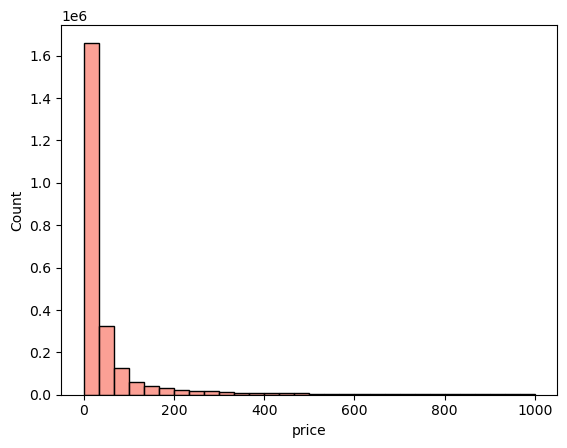

In [45]:
sns.histplot(df[df['price'] <= 1000]['price'], bins=30, color="salmon")
plt.show()

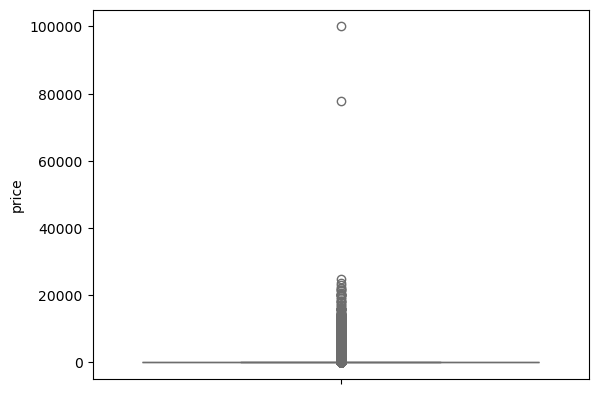

In [ ]:
sns.boxplot(data=df['price'], color='salmon')
plt.show()

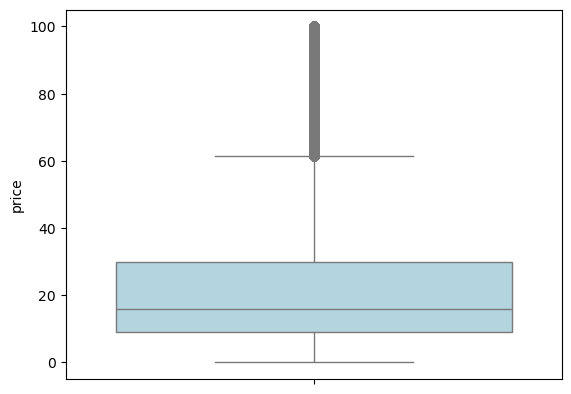

In [46]:
sns.boxplot(data =df[df['price'] <= 100]['price'], color="lightblue")
plt.show()

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved.

Los precios más comunes se encuentran aproximadamente entre 9–10 y 36 euros, ahi es donde se situan la mayoría de los productos. En el histograma es dificil de ver ya que hay valores extremadamente altos que lo distorsionan.

Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

Si, el boxplot muestra valores atípicos, los que más afectan a los datos son un producto de 100000 y otro de entre 75000 y 80000.

## Part 3: Unpacking Product Ratings

In [ ]:
# Measures of Centrality
mean_stars = df['stars'].mean()
median_stars = df['stars'].median()
mode_stars = df['stars'].mode()[0]

mean_stars, median_stars, mode_stars

(2.152836472966065, 0.0, 0.0)

Aunque la media de las valoraciones es de aproximadamente 2.15, tanto la mediana como la moda son 0.0, lo cual indica que la mayoría de los productos no tienen ninguna valoración.

In [49]:
# Measures of Dispersion
variance_stars = df['stars'].var()
std_dev_stars = df['stars'].std()
min_stars = df['stars'].min()
max_stars = df['stars'].max()
range_stars = max_stars - min_stars
Q1_stars = df['stars'].quantile(0.25)
Q3_stars = df['stars'].quantile(0.75)
IQR_stars = Q3_stars - Q1_stars

variance_stars, std_dev_stars, min_stars, max_stars, range_stars, IQR_stars


(4.81743402976196, 2.1948653785054697, 0.0, 5.0, 5.0, 4.4)

Hay una gran variedad en el feedback, el IQR de 4.4 estrellas revela que la mitad central de las valoraciones cubre casi toda la escala posible.

In [50]:
# Shape of the Distribution
skewness_stars = df['stars'].skew()
kurtosis_stars = df['stars'].kurtosis()

skewness_stars, kurtosis_stars

(0.08120735761080985, -1.9260061280432985)

La distribución es practicamente simétrica con inclinación a la derecha y tiene pocos outliers.

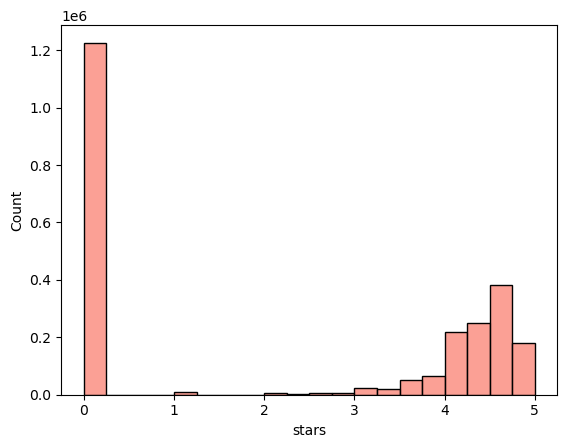

In [51]:
# Visualizations
sns.histplot(df['stars'], kde=False, bins=20, color="salmon")
plt.show()

El más común es 0, osea que no hayan puntuado el producto.